In [1]:
import pandas as pd, numpy as np
from csdid.att_gt import ATTgt

In [2]:

import yaml, pandas as pd

with open('../configs/data.yml') as f:
  dt = yaml.safe_load(f)

path_dt = f"../{dt['mpdata']}"
data = pd.read_csv(path_dt)


yname = "lemp"
gname = "first.treat"
idname = "countyreal"
tname = "year"
xformla = f"lemp~1"

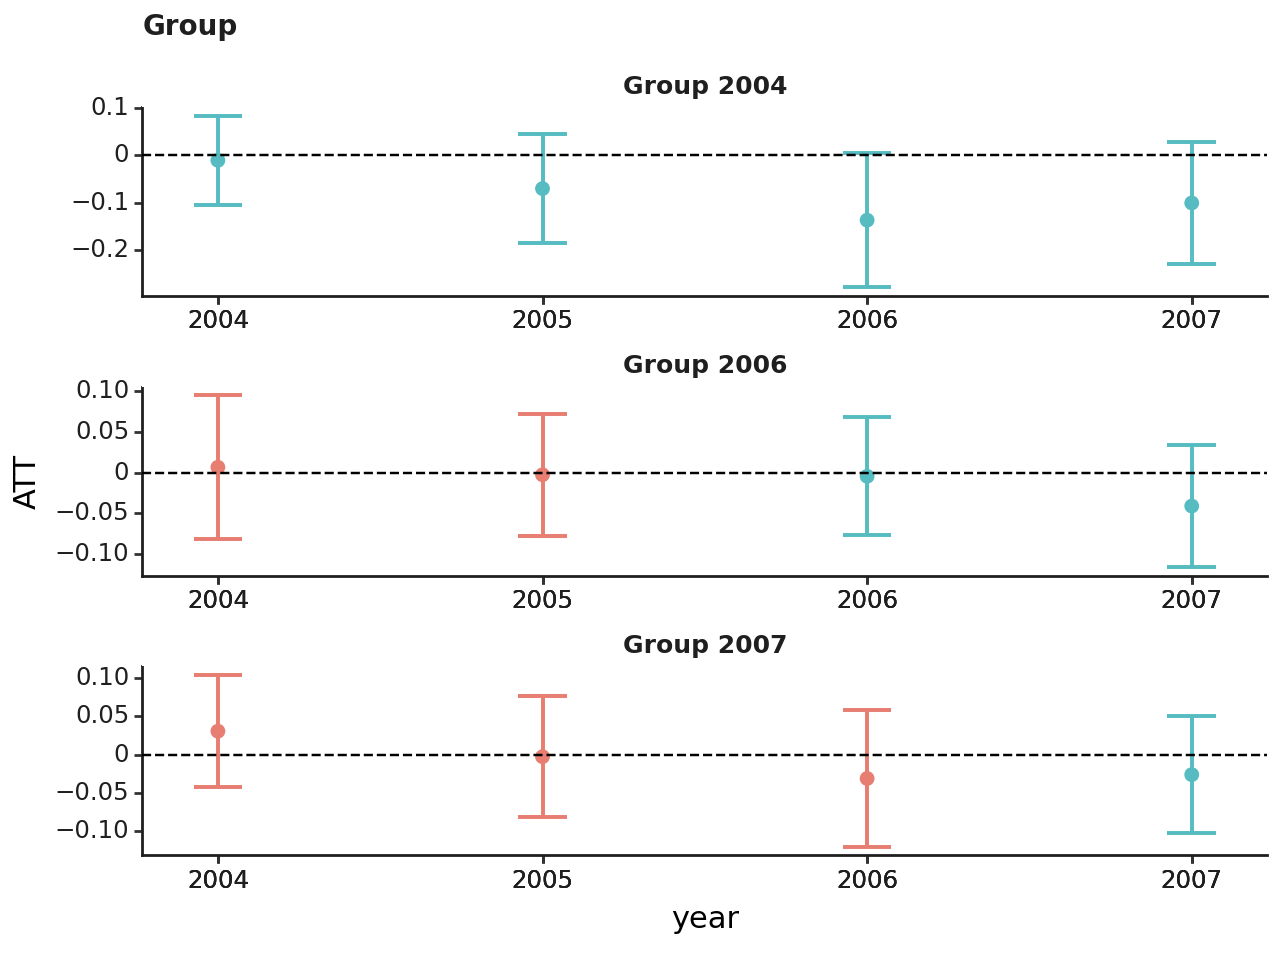

<Figure Size: (640 x 480)>

In [3]:
b = ATTgt(yname, tname, idname, gname, data = data, xformla=xformla).fit()
b.plot_attgt()

In [10]:

pd.DataFrame(b.results)

,group,year,att,post,se,l_se,c,u_se,sig
0,2004,2004,-0.010503,1,0.032064,-0.097082,2.700202,0.076075,
1,2004,2005,-0.070423,1,0.040349,-0.179374,2.700202,0.038527,
2,2004,2006,-0.137259,1,0.049840,-0.271836,2.700202,-0.002682,*
3,2004,2007,-0.100811,1,0.042972,-0.216844,2.700202,0.015221,
4,2006,2004,0.006520,0,0.032449,-0.081098,2.700202,0.094139,
5,2006,2005,-0.002751,0,0.026601,-0.074579,2.700202,0.069078,
6,2006,2006,-0.004595,1,0.024831,-0.071642,2.700202,0.062453,
7,2006,2007,-0.041224,1,0.030319,-0.123092,2.700202,0.040643,
8,2007,2004,0.030507,0,0.026478,-0.040990,2.700202,0.102004,
9,2007,2005,-0.002726,0,0.029590,-0.082626,2.700202,0.077174,


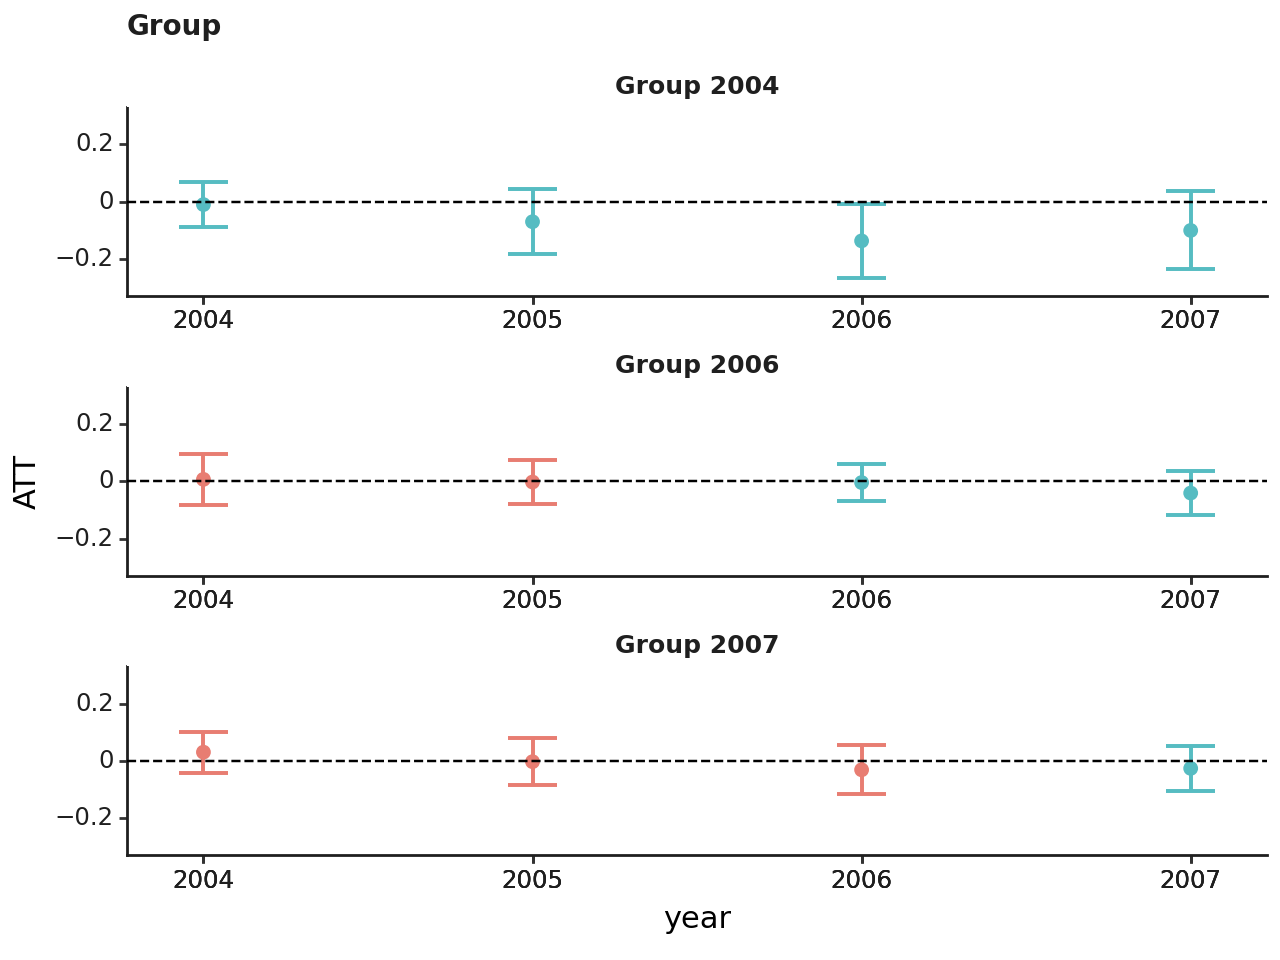

<Figure Size: (640 x 480)>

In [11]:
b.plot_attgt(ylim=(-.3, .3))